In [1]:
#!pip install -U sahi
#!pip install -U inference rfdetr

In [2]:
from sahi import AutoDetectionModel
from sahi.predict import get_sliced_prediction, get_prediction
from sahi.utils.file import download_from_url
from sahi.utils.cv import read_image
from IPython.display import Image

In [3]:
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/small-vehicles1.jpeg', 'demo_data/small-vehicles1.jpeg')

### Roboflow Universe

In [4]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type='roboflow',
    model='rfdetr-base',  # no api_token is required
    # model='vehicles-q0x2v/1',  # api_token is required
    confidence_threshold=0.5,
    device="cpu",
)

/home/darius/repos/sahi/.venv/lib/python3.12/site-packages/inference/models/utils.py:340: ModelDependencyMissing: Your `inference` configuration does not support Qwen2.5-VL model. Use pip install 'inference[transformers]' to install missing requirements.
  warnings.warn(
/home/darius/repos/sahi/.venv/lib/python3.12/site-packages/inference/models/utils.py:352: ModelDependencyMissing: Your `inference` configuration does not support SAM model. Use pip install 'inference[sam]' to install missing requirements.
  warnings.warn(
/home/darius/repos/sahi/.venv/lib/python3.12/site-packages/inference/models/utils.py:362: ModelDependencyMissing: Your `inference` configuration does not support SAM model. Use pip install 'inference[sam]' to install missing requirements.
  warnings.warn(
/home/darius/repos/sahi/.venv/lib/python3.12/site-packages/inference/models/utils.py:373: ModelDependencyMissing: Your `inference` configuration does not support SAM model. Use pip install 'inference[clip]' to instal

In [5]:
result = get_prediction(
    "demo_data/small-vehicles1.jpeg",
    detection_model,
)
result.export_visuals(export_dir="demo_data/")
Image("demo_data/prediction_visual.png")

Performing prediction on 18 slices.


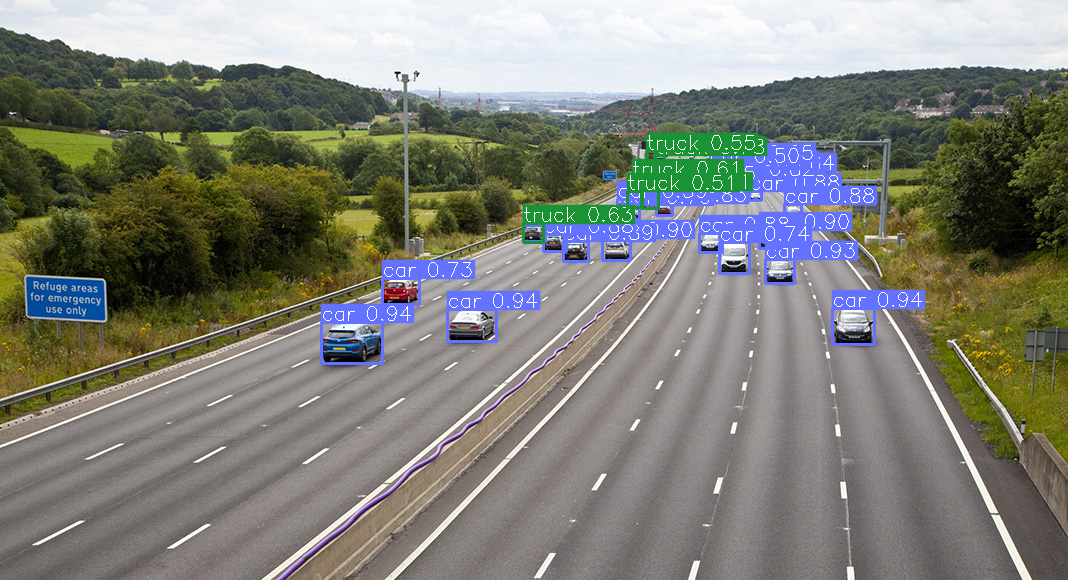

In [6]:
result_sliced = get_sliced_prediction(
    "demo_data/small-vehicles1.jpeg",
    detection_model,
    slice_height = 224,
    slice_width = 224,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2,
)
result_sliced.export_visuals(export_dir="demo_data/")
Image("demo_data/prediction_visual.png")

## FRDETRBase (class)

In [7]:
from rfdetr import RFDETRBase
from rfdetr.util.coco_classes import COCO_CLASSES

In [8]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type='roboflow',
    model=RFDETRBase,
    confidence_threshold=0.5,
    category_mapping=COCO_CLASSES,
    device="cpu",
)

06/06/2025 00:47:14 - WARNING - rfdetr.main -   num_classes mismatch: pretrain weights has 90 classes, but your model has 80 classes
reinitializing detection head with 90 classes


Loading pretrain weights


In [9]:
result = get_prediction(
    "demo_data/small-vehicles1.jpeg",
    detection_model,
)
result.export_visuals(export_dir="demo_data/")
Image("demo_data/prediction_visual.png")

Performing prediction on 18 slices.


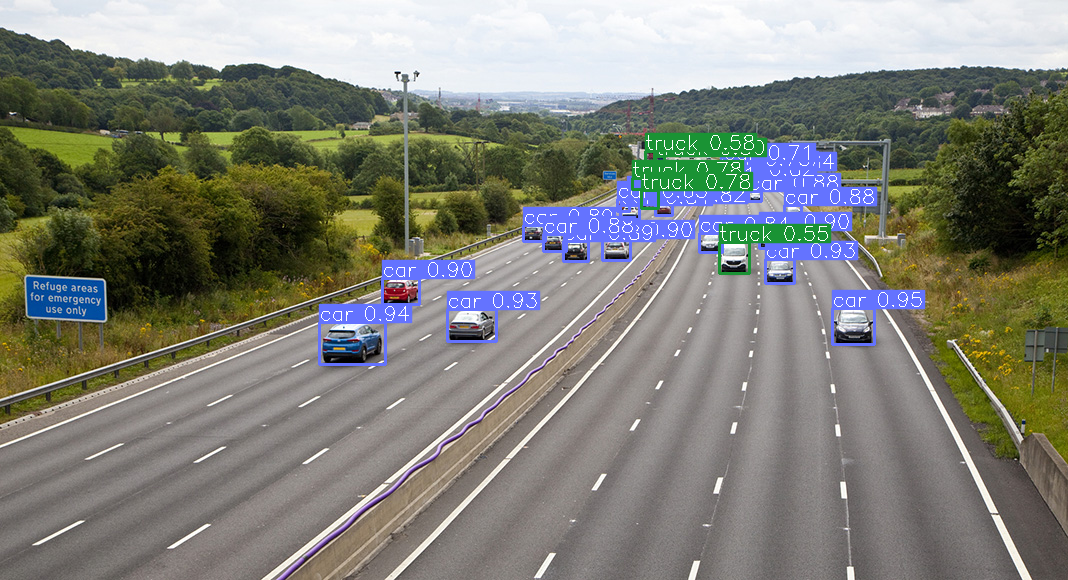

In [10]:
result_sliced = get_sliced_prediction(
    "demo_data/small-vehicles1.jpeg",
    detection_model,
    slice_height = 224,
    slice_width = 224,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2,
)
result_sliced.export_visuals(export_dir="demo_data/")
Image("demo_data/prediction_visual.png")

## FRDETRBase (instance)

In [11]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type='roboflow',
    model=RFDETRBase(),
    confidence_threshold=0.5,
    category_mapping=COCO_CLASSES,
    device="cpu",
)

Loading pretrain weights


In [12]:
result = get_prediction(
    "demo_data/small-vehicles1.jpeg",
    detection_model,
)
result.export_visuals(export_dir="demo_data/")
Image("demo_data/prediction_visual.png")

Performing prediction on 18 slices.


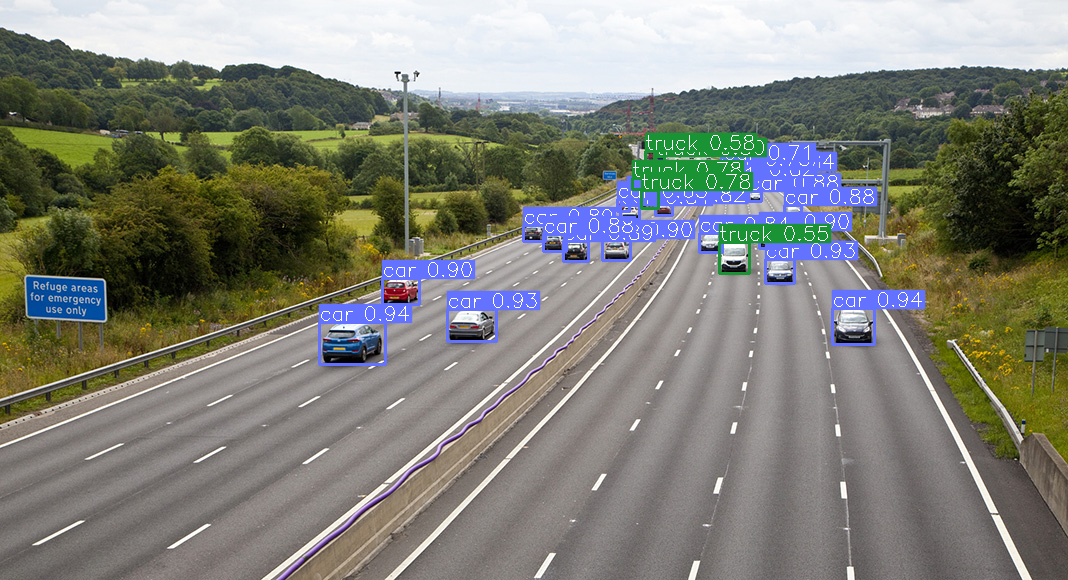

In [13]:
result_sliced = get_sliced_prediction(
    "demo_data/small-vehicles1.jpeg",
    detection_model,
    slice_height = 224,
    slice_width = 224,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2,
)
result_sliced.export_visuals(export_dir="demo_data/")
Image("demo_data/prediction_visual.png")